In [259]:
library(tidyverse)
library(readr)
library(ggplot2)
library(lubridate)
library(readxl)
library(knitr)
library(RSQLite)
library(data.table)

# data.table package

**data.table is an enhanced alternative to data.frame and tibble**
* Good for handling tabular data

* fread() is fast read, it is a data.table version of read_csv(), but can also read files from internet

In [260]:
library(data.table)
url <- "https://opendata.ecdc.europa.eu/covid19/casedistribution/csv"
covid_data_dt <- fread(url)

class(covid_data_dt)

[1] "data.table" "data.frame"

In [261]:
covid_data_dt

dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>
14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757,Asia,9.013779
13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757,Asia,7.052776
12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757,Asia,6.868768
11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757,Asia,7.134266
10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757,Asia,6.968658
09/12/2020,9,12,2020,135,13,Afghanistan,AF,AFG,38041757,Asia,6.963401
08/12/2020,8,12,2020,200,6,Afghanistan,AF,AFG,38041757,Asia,7.094835
07/12/2020,7,12,2020,210,26,Afghanistan,AF,AFG,38041757,Asia,7.215755
06/12/2020,6,12,2020,234,10,Afghanistan,AF,AFG,38041757,Asia,7.326160


**Comparing speed of fread() vs read.csv() vs read_csv()**
* fread() is the fastest

In [262]:
# Create a large .csv file
test_df <- data.frame(matrix(runif(1000000), nrow=100000))
write.csv(test_df, 'test_df.csv', row.names = F)

# Time taken by read.csv to import
system.time({test_df_base <- read.csv("test_df.csv")})
# Time taken by read_csv to import
system.time({test_df_readr <- read_csv("test_df.csv")})
# Time taken by fread to import
system.time({test_dt <- fread("test_df.csv")})

   user  system elapsed 
  1.224   0.009   1.234 

Rows: 100000 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (10): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


   user  system elapsed 
  0.463   0.001   0.183 

   user  system elapsed 
  0.046   0.005   0.029 

**create table**

In [263]:
test_dt <- data.table(ID = c("b","b","b","a","a","c"),
                      a  = 1:6,
                      b  = 7:12,
                      c  = 13:18)

test_dt

ID,a,b,c
<chr>,<int>,<int>,<int>
b,1,7,13
b,2,8,14
b,3,9,15
a,4,10,16
a,5,11,17
c,6,12,18


**Converting to data.table from data.frame**

In [264]:
customers <- data.frame(
  name = c("Alice", "Bob", "Charlie", "David", "Emily", "Frank"),
  age = c(25, 32, 41, 28, 39, 45),
  gender = c("F", "M", "M", "M", "F", "M")
)

customers

name,age,gender
<chr>,<dbl>,<chr>
Alice,25,F
Bob,32,M
Charlie,41,M
David,28,M
Emily,39,F
Frank,45,M


In [265]:
customers_dt = as.data.table(customers)
customers_dt

name,age,gender
<chr>,<dbl>,<chr>
Alice,25,F
Bob,32,M
Charlie,41,M
David,28,M
Emily,39,F
Frank,45,M


* Permanent conversion

In [266]:
setDT(customers)
customers

name,age,gender
<chr>,<dbl>,<chr>
Alice,25,F
Bob,32,M
Charlie,41,M
David,28,M
Emily,39,F
Frank,45,M


**But data.table could not get row names**
* therefore must be extracted manually from data.frame and insert manually to data.table

In [267]:
rownames(customers)

[1] "1" "2" "3" "4" "5" "6"

**1.0 Installation DONE**

**2.0 Importing Data**

In [268]:
library(data.table)
url <- "https://opendata.ecdc.europa.eu/covid19/casedistribution/csv"
covid_data_dt <- fread(url)

class(covid_data_dt)

[1] "data.table" "data.frame"

In [269]:
covid_data_dt

dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>
14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757,Asia,9.013779
13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757,Asia,7.052776
12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757,Asia,6.868768
11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757,Asia,7.134266
10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757,Asia,6.968658
09/12/2020,9,12,2020,135,13,Afghanistan,AF,AFG,38041757,Asia,6.963401
08/12/2020,8,12,2020,200,6,Afghanistan,AF,AFG,38041757,Asia,7.094835
07/12/2020,7,12,2020,210,26,Afghanistan,AF,AFG,38041757,Asia,7.215755
06/12/2020,6,12,2020,234,10,Afghanistan,AF,AFG,38041757,Asia,7.326160


# data.table syntax 
* take data covid_data_dt
* subset/reorder rows using i
* calculate j
* grouped by 'by'

In [270]:
## FROM[WHERE, SELECT/ORDER BY/UPDATE, GROUP BY]

#covid_data_dt[i, j, by]

# Example (filter by year, sum cases, group by continent)
covid_data_dt[year == 2019, sum(cases), by = continentExp]

continentExp,V1
<chr>,<int>
Asia,27
Africa,0
Europe,0
Oceania,0
America,0
Other,0


**3.0 Basic row column operations**
* filtering rows based on conditions
* Get all rows or observations for Germany in June

In [271]:
covid_data_dt[countriesAndTerritories == "Germany" & 
              lubridate::month(dateRep, label = T, abbr = F) == "June"]

dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>
30/06/2020,30,6,2020,498,12,Germany,DE,DEU,83019213,Europe,8.937690
29/06/2020,29,6,2020,262,4,Germany,DE,DEU,83019213,Europe,8.793145
28/06/2020,28,6,2020,256,3,Germany,DE,DEU,83019213,Europe,8.708827
27/06/2020,27,6,2020,687,6,Germany,DE,DEU,83019213,Europe,8.697987
26/06/2020,26,6,2020,477,21,Germany,DE,DEU,83019213,Europe,8.289647
25/06/2020,25,6,2020,630,13,Germany,DE,DEU,83019213,Europe,8.025853
24/06/2020,24,6,2020,587,19,Germany,DE,DEU,83019213,Europe,7.935512
23/06/2020,23,6,2020,503,10,Germany,DE,DEU,83019213,Europe,7.611491
22/06/2020,22,6,2020,537,3,Germany,DE,DEU,83019213,Europe,7.427196


In [272]:
covid_data_dt[covid_data_dt$countriesAndTerritories == "Germany" & 
              lubridate::month(covid_data_dt$dateRep, label = T, abbr = F) == "June"]

dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>
30/06/2020,30,6,2020,498,12,Germany,DE,DEU,83019213,Europe,8.937690
29/06/2020,29,6,2020,262,4,Germany,DE,DEU,83019213,Europe,8.793145
28/06/2020,28,6,2020,256,3,Germany,DE,DEU,83019213,Europe,8.708827
27/06/2020,27,6,2020,687,6,Germany,DE,DEU,83019213,Europe,8.697987
26/06/2020,26,6,2020,477,21,Germany,DE,DEU,83019213,Europe,8.289647
25/06/2020,25,6,2020,630,13,Germany,DE,DEU,83019213,Europe,8.025853
24/06/2020,24,6,2020,587,19,Germany,DE,DEU,83019213,Europe,7.935512
23/06/2020,23,6,2020,503,10,Germany,DE,DEU,83019213,Europe,7.611491
22/06/2020,22,6,2020,537,3,Germany,DE,DEU,83019213,Europe,7.427196


**Get first 2 rows**

In [273]:
covid_data_dt[1:2]

dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>
14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757,Asia,9.013779
13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757,Asia,7.052776


**Sorting the columns**
* sorting year, month, day in ascending order
* sorting countriesAndTerritories in descending order

In [274]:
covid_data_dt[order(year, month, day, -countriesAndTerritories)]

dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>
31/12/2019,31,12,2019,0,0,Vietnam,VN,VNM,96462108,Asia,NA
31/12/2019,31,12,2019,0,0,United_States_of_America,US,USA,329064917,America,NA
31/12/2019,31,12,2019,0,0,United_Kingdom,UK,GBR,66647112,Europe,NA
31/12/2019,31,12,2019,0,0,United_Arab_Emirates,AE,ARE,9770526,Asia,NA
31/12/2019,31,12,2019,0,0,Thailand,TH,THA,69625581,Asia,NA
31/12/2019,31,12,2019,0,0,Taiwan,TW,CNG1925,23773881,Asia,NA
31/12/2019,31,12,2019,0,0,Switzerland,CH,CHE,8544527,Europe,NA
31/12/2019,31,12,2019,0,0,Sweden,SE,SWE,10230185,Europe,NA
31/12/2019,31,12,2019,0,0,Sri_Lanka,LK,LKA,21323734,Asia,NA


**4.0 Select columns in j and rename columns**
* skipping i column using ,
* select columns by name or by index
* drop columns by - or !
* .. is for up one level

In [275]:
# Return as a vector
covid_data_dt[,geoId]
# Select multiple columns
covid_data_dt[,c("geoId", "countriesAndTerritories")]

# Return as a data.table
covid_data_dt[,list(geoId)]
# Short form using .
covid_data_dt[,.(geoId)]
# Select multiple columns
covid_data_dt[,.(geoId, countriesAndTerritories)]

# Rename them directly
covid_data_dt[,.(CountryCode = geoId, country = countriesAndTerritories)]

# select columns named in a variable using the ..prefix
select_cols = c("cases", "deaths")
covid_data_dt[, ..select_cols]

[1] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
    [7] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
   [13] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
   [19] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
   [25] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
   [31] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
   [37] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
   [43] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
   [49] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
   [55] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
   [61] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
   [67] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
   [73] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
   [79] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
   [85] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
   [91] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
   [97] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
  [103] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
  [109] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
  [115] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
  [121] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
  [127] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
  [133] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
  [139] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
  [145] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
  [151] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
  [157] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
  [163] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
  [169] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
  [175] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
  [181] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
  [187] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
  [193] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
  [199] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
  [205] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
  [211] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
  [217] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
  [223] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
  [229] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
  [235] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
  [241] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
  [247] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
  [253] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
  [259] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
  [265] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
  [271] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
  [277] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
  [283] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
  [289] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
  [295] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
  [301] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
  [307] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
  [313] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
  [319] "AF"       "AF"       "AF"       "AF"       "AF"       "AF"      
  [325] 

geoId,countriesAndTerritories
<chr>,<chr>
AF,Afghanistan
AF,Afghanistan
AF,Afghanistan
AF,Afghanistan
AF,Afghanistan
AF,Afghanistan
AF,Afghanistan
AF,Afghanistan
AF,Afghanistan


geoId
<chr>
AF
AF
AF
AF
AF
AF
AF
AF
AF


geoId
<chr>
AF
AF
AF
AF
AF
AF
AF
AF
AF


geoId,countriesAndTerritories
<chr>,<chr>
AF,Afghanistan
AF,Afghanistan
AF,Afghanistan
AF,Afghanistan
AF,Afghanistan
AF,Afghanistan
AF,Afghanistan
AF,Afghanistan
AF,Afghanistan


CountryCode,country
<chr>,<chr>
AF,Afghanistan
AF,Afghanistan
AF,Afghanistan
AF,Afghanistan
AF,Afghanistan
AF,Afghanistan
AF,Afghanistan
AF,Afghanistan
AF,Afghanistan


cases,deaths
<int>,<int>
746,6
298,9
113,11
63,10
202,16
135,13
200,6
210,26
234,10


**Rename columns**
* setnames(x, old, new)

In [276]:
# List names 
colnames(covid_data_dt)
setnames(covid_data_dt, "dateRep", "date")
setnames(covid_data_dt, "countriesAndTerritories", "country")
setnames(covid_data_dt, "continentExp", "continent")

[1] "dateRep"                                                   
 [2] "day"                                                       
 [3] "month"                                                     
 [4] "year"                                                      
 [5] "cases"                                                     
 [6] "deaths"                                                    
 [7] "countriesAndTerritories"                                   
 [8] "geoId"                                                     
 [9] "countryterritoryCode"                                      
[10] "popData2019"                                               
[11] "continentExp"                                              
[12] "Cumulative_number_for_14_days_of_COVID-19_cases_per_100000"

In [277]:
covid_data_dt

date,day,month,year,cases,deaths,country,geoId,countryterritoryCode,popData2019,continent,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>
14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757,Asia,9.013779
13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757,Asia,7.052776
12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757,Asia,6.868768
11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757,Asia,7.134266
10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757,Asia,6.968658
09/12/2020,9,12,2020,135,13,Afghanistan,AF,AFG,38041757,Asia,6.963401
08/12/2020,8,12,2020,200,6,Afghanistan,AF,AFG,38041757,Asia,7.094835
07/12/2020,7,12,2020,210,26,Afghanistan,AF,AFG,38041757,Asia,7.215755
06/12/2020,6,12,2020,234,10,Afghanistan,AF,AFG,38041757,Asia,7.326160


# Exercise
* convert built-in 'airquality' dataset to data.table 
* select Solar.R, Wind, Temp for data with 'Ozone' not missing (use is.na())

In [278]:
# List all internal data sets
data()

# Load specified data sets
data("airquality")

Package,Item,Title
<chr>,<chr>,<chr>
lubridate,lakers,Lakers 2008-2009 basketball data set
forcats,gss_cat,A sample of categorical variables from the General Social survey
stringr,fruit,Sample character vectors for practicing string manipulations
stringr,sentences,Sample character vectors for practicing string manipulations
stringr,words,Sample character vectors for practicing string manipulations
dplyr,band_instruments,Band membership
dplyr,band_instruments2,Band membership
dplyr,band_members,Band membership
dplyr,starwars,Starwars characters


In [279]:
# Solution 1
aq_dt <- data.table(airquality)
aq_dt[!is.na(Ozone), .(Solar.R, Wind, Temp)]

Solar.R,Wind,Temp
<int>,<dbl>,<int>
190,7.4,67
118,8.0,72
149,12.6,74
313,11.5,62
NA,14.9,66
299,8.6,65
99,13.8,59
19,20.1,61
NA,6.9,74


In [280]:
# Solution 2
setDT(airquality)
airquality[!is.na(Ozone), .(Solar.R, Wind, Temp)]

Solar.R,Wind,Temp
<int>,<dbl>,<int>
190,7.4,67
118,8.0,72
149,12.6,74
313,11.5,62
NA,14.9,66
299,8.6,65
99,13.8,59
19,20.1,61
NA,6.9,74


****

**5.0 Compute or do j**
* How many days did it take for a country to have >1000 deaths

In [281]:
covid_data_dt[,sum(deaths > 1000)]

# to list the observations put it in i
covid_data_dt[deaths > 1000]

[1] 266

date,day,month,year,cases,deaths,country,geoId,countryterritoryCode,popData2019,continent,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>
02/10/2020,2,10,2020,14001,3351,Argentina,AR,ARG,44780675,America,393.0043
07/09/2020,7,9,2020,528,1610,Bolivia,BO,BOL,11513102,America,100.9285
01/10/2020,1,10,2020,33413,1031,Brazil,BR,BRA,211049519,America,185.6683
16/09/2020,16,9,2020,36653,1113,Brazil,BR,BRA,211049519,America,204.3748
10/09/2020,10,9,2020,35816,1075,Brazil,BR,BRA,211049519,America,227.7821
03/09/2020,3,9,2020,46934,1184,Brazil,BR,BRA,211049519,America,256.4389
02/09/2020,2,9,2020,42659,1215,Brazil,BR,BRA,211049519,America,257.5590
27/08/2020,27,8,2020,47161,1085,Brazil,BR,BRA,211049519,America,261.7258
26/08/2020,26,8,2020,47134,1271,Brazil,BR,BRA,211049519,America,265.5135


**6.0 Create new columns**
* using :=

In [282]:
covid_data_dt[, deaths_per_capita := deaths / popData2019]

* create multiple columns at the same time

In [283]:
covid_data_dt[,  `:=`(deaths_per_capita = deaths / popData2019,
                      cases_per_capita = cases / popData2019,
                      deaths_per_cases = deaths / cases)]



* delete a column

In [284]:
# To delete a column, assign it to NULL
covid_data_dt[, deaths_per_cases := NULL]

* modify column

In [285]:
covid_data_dt[,date := lubridate::dmy(date)]

In [286]:
covid_data_dt

date,day,month,year,cases,deaths,country,geoId,countryterritoryCode,popData2019,continent,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,deaths_per_capita,cases_per_capita
<date>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>
2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757,Asia,9.013779,1.577214e-07,1.961003e-05
2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757,Asia,7.052776,2.365821e-07,7.833497e-06
2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757,Asia,6.868768,2.891559e-07,2.970420e-06
2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757,Asia,7.134266,2.628690e-07,1.656075e-06
2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757,Asia,6.968658,4.205905e-07,5.309955e-06
2020-12-09,9,12,2020,135,13,Afghanistan,AF,AFG,38041757,Asia,6.963401,3.417297e-07,3.548732e-06
2020-12-08,8,12,2020,200,6,Afghanistan,AF,AFG,38041757,Asia,7.094835,1.577214e-07,5.257381e-06
2020-12-07,7,12,2020,210,26,Afghanistan,AF,AFG,38041757,Asia,7.215755,6.834595e-07,5.520250e-06
2020-12-06,6,12,2020,234,10,Afghanistan,AF,AFG,38041757,Asia,7.326160,2.628690e-07,6.151135e-06


****

# Exercise 2
* convert built-in 'mtcars' dataset to data.table
* create new column called 'mileage_type' that has the value 'high' if mpg > 20, else 'low'. Use ifelse()

In [287]:
#data()
data("mtcars") # step not absolutely necessary
mtcars$carname <- rownames(mtcars)
mtcars_dt <- as.data.table(mtcars)
mtcars_dt[, mileage_type := ifelse(mpg > 20, 'high', 'low')]

mtcars_dt

mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,carname,mileage_type
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,Mazda RX4,high
21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,Mazda RX4 Wag,high
22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,Datsun 710,high
21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,Hornet 4 Drive,high
18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,Hornet Sportabout,low
18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,Valiant,low
14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,Duster 360,low
24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,Merc 240D,high
22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,Merc 230,high


****

**7.0 Subset in i and do in j**
* calculate average number of new cases and deaths in Germany in April

In [288]:
covid_data_dt[country == "Germany" & month == 4, 
              .(m_cases = mean(cases), 
                m_death = mean(deaths)
                )
              ]

m_cases,m_death
<dbl>,<dbl>
3240.2,190.1667


* How many days di it take USA to lose 1000 people in June

In [289]:
covid_data_dt[country == "United_States_of_America" & 
              month == 5 & deaths < 1000, 
              length(day)
             ]

[1] 7

In [290]:
covid_data_dt[country == "United_States_of_America" & 
              month == 5 & deaths < 1000, 
              .N
             ]

[1] 7

**8.0 Aggregations / Grouping**
* Get number of days, when deaths > 1000, for each country
* .N will hold the number of rows of each group
* .I will give the row number

In [291]:
covid_data_dt[deaths > 1000, .N, by = country]

country,N
<chr>,<int>
Argentina,1
Bolivia,1
Brazil,65
Chile,1
China,1
Ecuador,1
France,9
India,41
Mexico,4


In [292]:
covid_data_dt[,.I[deaths > 1000]]

[1]  2117  7021  8066  8081  8087  8094  8095  8101  8102  8106  8107  8108
 [13]  8109  8113  8114  8115  8116  8120  8121  8122  8123  8126  8127  8128
 [25]  8129  8133  8134  8135  8136  8137  8141  8142  8143  8144  8147  8148
 [37]  8149  8150  8151  8154  8155  8156  8157  8158  8161  8163  8164  8165
 [49]  8168  8169  8170  8171  8172  8177  8178  8179  8183  8184  8185  8186
 [61]  8190  8191  8192  8193  8197  8198  8200 11963 12340 16907 20384 20388
 [73] 20391 20398 20607 20613 20615 20618 20619 26803 26818 26819 26820 26821
 [85] 26823 26824 26825 26826 26827 26828 26829 26830 26831 26832 26833 26834
 [97] 26835 26836 26837 26838 26839 26840 26841 26842 26843 26844 26845 26846
[109] 26847 26848 26849 26853 26854 26855 26856 26863 26868 26872 26890 26926
[121] 36986 37037 37146 37164 44887 44908 52763 52901 58612 58615 58618 58620
[133] 58622 58626 58627 58628 58629 59002 59003 59004 59005 59006 59007 59008
[145] 59009 59010 59011 59012 59013 59014 59015 59017 59018 59019 59020 59021
[157] 59024 59025 59026 59027 59028 59029 59031 59032 59034 59035 59038 59039
[169] 59040 59041 59042 59046 59055 59067 59083 59091 59095 59097 59103 59104
[181] 59105 59108 59110 59111 59112 59116 59117 59118 59119 59122 59123 59124
[193] 59125 59126 59129 59130 59131 59132 59133 59136 59137 59138 59139 59140
[205] 59141 59144 59145 59146 59147 59161 59168 59173 59194 59196 59200 59201
[217] 59202 59206 59207 59208 59209 59210 59213 59214 59215 59216 59217 59218
[229] 59220 59221 59222 59223 59224 59225 59226 59227 59228 59229 59230 59231
[241] 59232 59233 59234 59235 59236 59237 59238 59239 59240 59241 59242 59243
[253] 59244 59245 59246 59247 59248 59249 59250 59251 59252 59253 59254 59255
[265] 59256 59258

* Get average death and case number for each country for each month in Europe
* If column names are not provided, it will be V1, V2

In [293]:
covid_data_dt[continent == "Europe",
              .(mean(cases), mean(deaths)),
              by = .(country, month, year)
             ]

country,month,year,V1,V2
<chr>,<int>,<int>,<dbl>,<dbl>
Albania,12,2020,778.9285714,14.64285714
Albania,11,2020,566.3666667,9.86666667
Albania,10,2020,229.5483871,3.80645161
Albania,9,2020,137.9333333,3.46666667
Albania,8,2020,134.9354839,4.06451613
Albania,7,2020,88.0967742,3.09677419
Albania,6,2020,44.8000000,0.83333333
Albania,5,2020,11.4838710,0.06451613
Albania,4,2020,18.1000000,0.63333333


****

# Exercise 3
* Compute the number of cars and the mean mileage for each gear type

In [294]:
library(magrittr) # to use the pipe


In [295]:
mtcars_dt

mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,carname,mileage_type
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,Mazda RX4,high
21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,Mazda RX4 Wag,high
22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,Datsun 710,high
21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,Hornet 4 Drive,high
18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,Hornet Sportabout,low
18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,Valiant,low
14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,Duster 360,low
24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,Merc 240D,high
22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,Merc 230,high


In [296]:
mtcars_dt[, .(.N, mileage = mean(mpg) %>% round(2)), by=gear]

gear,N,mileage
<dbl>,<int>,<dbl>
4,12,24.53
3,15,16.11
5,5,21.38


****

**9.0 Chaining / Advanced operations**
* order covid_cases_means using the m_death in descending

In [297]:
covid_cases_means <- covid_data_dt[,.(m_cases  = mean(cases) %>% round(1), 
                                      m_deaths = mean(deaths) %>% round(1)), 
                                      by = .(country)
                                  ]

covid_cases_means

country,m_cases,m_deaths
<chr>,<dbl>,<dbl>
Afghanistan,144.9,5.8
Albania,172.7,3.6
Algeria,267.0,7.5
Andorra,26.6,0.3
Angola,60.4,1.4
Anguilla,0.0,0.0
Antigua_and_Barbuda,0.5,0.0
Argentina,5293.9,144.0
Armenia,436.0,7.3


In [298]:
covid_data_dt[, .(
                  m_cases  = round(mean(cases),  digits = 1), 
                  m_deaths = round(mean(deaths), digits = 1)
                 ), 
                 by = .(country)][order(-m_cases)]

country,m_cases,m_deaths
<chr>,<dbl>,<dbl>
United_States_of_America,46447.9,854.8
India,28321.2,410.8
Brazil,19719.9,518.3
Russia,7582.7,134.1
France,6791.0,165.5
Argentina,5293.9,144.0
United_Kingdom,5284.0,183.3
Italy,5267.7,184.3
Colombia,5110.3,140.0


In [299]:
covid_data_dt[, .N, 
                .(
                  death_gt_1k = deaths > 1000, 
                  cases_lt_1k = cases < 1000
                 )
             ]

death_gt_1k,cases_lt_1k,N
<lgl>,<lgl>,<int>
FALSE,TRUE,53821
FALSE,FALSE,7813
TRUE,FALSE,262
TRUE,TRUE,4


In [300]:
covid_data_dt[, .N, 
                
                  by = .(death_gt_1k = deaths > 1000, cases_lt_1k = cases < 1000, year)
             ]

death_gt_1k,cases_lt_1k,year,N
<lgl>,<lgl>,<int>,<int>
FALSE,TRUE,2020,53754
FALSE,FALSE,2020,7813
FALSE,TRUE,2019,67
TRUE,FALSE,2020,262
TRUE,TRUE,2020,4


**10.0 .SD**
* .SD is subset of data
* in order to compute every column without having to compute each column at a time

In [301]:
covid_data_dt[, print(.SD), by = year]

             date day month cases deaths     country geoId countryterritoryCode
    1: 2020-12-14  14    12   746      6 Afghanistan    AF                  AFG
    2: 2020-12-13  13    12   298      9 Afghanistan    AF                  AFG
    3: 2020-12-12  12    12   113     11 Afghanistan    AF                  AFG
    4: 2020-12-11  11    12    63     10 Afghanistan    AF                  AFG
    5: 2020-12-10  10    12   202     16 Afghanistan    AF                  AFG
   ---                                                                         
61829: 2020-03-25  25     3     0      0    Zimbabwe    ZW                  ZWE
61830: 2020-03-24  24     3     0      1    Zimbabwe    ZW                  ZWE
61831: 2020-03-23  23     3     0      0    Zimbabwe    ZW                  ZWE
61832: 2020-03-22  22     3     1      0    Zimbabwe    ZW                  ZWE
61833: 2020-03-21  21     3     1      0    Zimbabwe    ZW                  ZWE
       popData2019 continent
    1:    3

year
<int>


* calculating mean will get an error, because not all the columns are numerical

In [302]:
#covid_data_dt[, lapply(.SD, mean), by = year]

* mean on cases and deaths

In [303]:
covid_data_dt[, lapply(.SD, mean), 
                by = .(year, month), 
                .SDcols = c("cases", "deaths")
             ]

year,month,cases,deaths
<int>,<int>,<dbl>,<dbl>
2020,12,2899.3082858,50.8503858
2020,11,2685.5840125,42.4899687
2020,10,1834.6447106,27.7988638
2020,9,1348.6838915,25.8642743
2020,8,1229.1767248,27.5687606
2020,7,1090.8356228,25.6513351
2020,6,677.8632956,21.3860265
2020,5,447.4003713,21.6803837
2020,4,381.9745306,30.8865306


* sum on cases and deaths

In [304]:
covid_data_dt[, lapply(.SD, sum), 
                by = .(year, month), 
                .SDcols = c("cases", "deaths")
             ]

year,month,cases,deaths
<int>,<int>,<int>,<int>
2020,12,8642838,151585
2020,11,17134026,271086
2020,10,11949041,181054
2020,9,8456248,162169
2020,8,7963836,178618
2020,7,7067524,166195
2020,6,4249525,134069
2020,5,2891996,140142
2020,4,2339594,189180


**11.0 Keys**
* Setting keys on a data.table enables binary search
* binary search is faster than linear search, especially for large data

**Setting up the key**
* data will get sorted by that key

In [305]:
setkey(covid_data_dt, date, country)

**Testing the result**

In [306]:
covid_data_dt

date,day,month,year,cases,deaths,country,geoId,countryterritoryCode,popData2019,continent,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,deaths_per_capita,cases_per_capita
<date>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>
2019-12-31,31,12,2019,0,0,Afghanistan,AF,AFG,38041757,Asia,NA,0,0.000000e+00
2019-12-31,31,12,2019,0,0,Algeria,DZ,DZA,43053054,Africa,NA,0,0.000000e+00
2019-12-31,31,12,2019,0,0,Armenia,AM,ARM,2957728,Europe,NA,0,0.000000e+00
2019-12-31,31,12,2019,0,0,Australia,AU,AUS,25203200,Oceania,NA,0,0.000000e+00
2019-12-31,31,12,2019,0,0,Austria,AT,AUT,8858775,Europe,NA,0,0.000000e+00
2019-12-31,31,12,2019,0,0,Azerbaijan,AZ,AZE,10047719,Europe,NA,0,0.000000e+00
2019-12-31,31,12,2019,0,0,Bahrain,BH,BHR,1641164,Asia,NA,0,0.000000e+00
2019-12-31,31,12,2019,0,0,Belarus,BY,BLR,9452409,Europe,NA,0,0.000000e+00
2019-12-31,31,12,2019,0,0,Belgium,BE,BEL,11455519,Europe,NA,0,0.000000e+00


**merging data will be very direct**
* key() is used to get the current key columns of the data.table

In [307]:
# Create a new data.table
covid_data_EUR_dt <- covid_data_dt[ continent == "Europe", 
                                    lapply(.SD, function(x) {
                                                              x %>% 
                                                              mean() %>% 
                                                              round(1)
                                                             }
                                           ), 
                                    by = .(country), 
                                    .SDcols = c("cases", "deaths")
                                   ]

# Set key
setkey(covid_data_EUR_dt, country)
key(covid_data_EUR_dt)

# Create two data.tables from that
cd_dt1 <- covid_data_EUR_dt[, .(country, cases)]
cd_dt2 <- covid_data_EUR_dt[1:20, .(country, deaths)]

# Join them
cd_dt1[cd_dt2]

[1] "country"

country,cases,deaths
<chr>,<dbl>,<dbl>
Albania,172.7,3.6
Andorra,26.6,0.3
Armenia,436.0,7.3
Austria,914.4,12.6
Azerbaijan,512.8,5.6
Belarus,468.7,3.7
Belgium,1737.1,51.3
Bosnia_and_Herzegovina,365.0,12.0
Bulgaria,640.9,20.3


**Removing the key**

In [308]:
# Remove keys
setkey(cd_dt1, NULL)
setkey(cd_dt2, NULL)
# Join
##cd_dt1[cd_dt2, on = "country"]
# If they had different colnames
##cd_dt1[cd_dt2, on = c(colA = "colB")]
cd_dt1[cd_dt2, on = "country", deaths := i.deaths]
# Alternatively you can use the function merge()
# Inner Join
merge(cd_dt1, cd_dt2, by='country')
# Left Join
merge(cd_dt1, cd_dt2, by='country', all.x = T)
# Outer Join
merge(cd_dt1, cd_dt2, by='country', all = T)
# If they had different colnames use by.x="colA", by.y="colB"

country,cases,deaths.x,deaths.y
<chr>,<dbl>,<dbl>,<dbl>
Albania,172.7,3.6,3.6
Andorra,26.6,0.3,0.3
Armenia,436.0,7.3,7.3
Austria,914.4,12.6,12.6
Azerbaijan,512.8,5.6,5.6
Belarus,468.7,3.7,3.7
Belgium,1737.1,51.3,51.3
Bosnia_and_Herzegovina,365.0,12.0,12.0
Bulgaria,640.9,20.3,20.3


country,cases,deaths.x,deaths.y
<chr>,<dbl>,<dbl>,<dbl>
Albania,172.7,3.6,3.6
Andorra,26.6,0.3,0.3
Armenia,436.0,7.3,7.3
Austria,914.4,12.6,12.6
Azerbaijan,512.8,5.6,5.6
Belarus,468.7,3.7,3.7
Belgium,1737.1,51.3,51.3
Bosnia_and_Herzegovina,365.0,12.0,12.0
Bulgaria,640.9,20.3,20.3


country,cases,deaths.x,deaths.y
<chr>,<dbl>,<dbl>,<dbl>
Albania,172.7,3.6,3.6
Andorra,26.6,0.3,0.3
Armenia,436.0,7.3,7.3
Austria,914.4,12.6,12.6
Azerbaijan,512.8,5.6,5.6
Belarus,468.7,3.7,3.7
Belgium,1737.1,51.3,51.3
Bosnia_and_Herzegovina,365.0,12.0,12.0
Bulgaria,640.9,20.3,20.3


**Merge multiple data.tables**

In [309]:
dt_list    <- list(cd_dt1, cd_dt2)
merge_func <- function(...) merge(..., all = TRUE, by='country')
dt_merged  <- Reduce(merge_func, dt_list)

dt_merged

country,cases,deaths.x,deaths.y
<chr>,<dbl>,<dbl>,<dbl>
Albania,172.7,3.6,3.6
Andorra,26.6,0.3,0.3
Armenia,436.0,7.3,7.3
Austria,914.4,12.6,12.6
Azerbaijan,512.8,5.6,5.6
Belarus,468.7,3.7,3.7
Belgium,1737.1,51.3,51.3
Bosnia_and_Herzegovina,365.0,12.0,12.0
Bulgaria,640.9,20.3,20.3


**12.0 set() function**
* Assigning values to a new column
* set(dt, i, j, value)
* i is the row number
* j is column number
* must use integers (ex: 10L instead of 10)

In [310]:
m  = matrix(1,nrow=100000,ncol=100)
DF = as.data.frame(m)
DT = as.data.table(m)
    
system.time(for (i in 1:10000) DF[i,1] <- i)
## 591 seconds

system.time(for (i in 1:10000) DT[i,V1:=i])
## 2.4 seconds  ( 246 times faster, 2.4 is overhead in [.data.table )

system.time(for (i in 1:10000) set(DT,i,1L,i))
## 0.03 seconds  ( 19700 times faster, overhead of [.data.table is avoided )

   user  system elapsed 
  7.966   0.000   7.973 

   user  system elapsed 
  3.941   0.012   3.954 

   user  system elapsed 
  0.031   0.000   0.031 

# Business Case 
* Wrangling larga data for Bank loan defualts
* Find which people or institution will default, and then prevent it

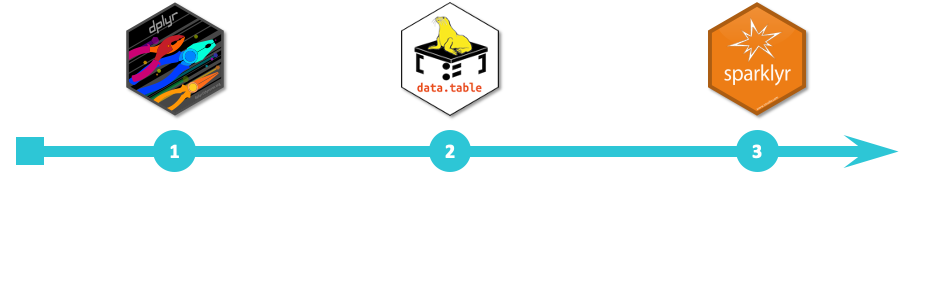

**1.0 Library**

In [311]:
# Tidyverse
library(tidyverse)
library(vroom)

# Data Table
library(data.table)

# Counter
library(tictoc)


**2.0 Data import**
* Create the table columns 
* import using vroom

In [312]:
# 2.0 DATA IMPORT ----

# 2.1 Loan Acquisitions Data ----

col_types_acq <- list(
    loan_id                            = col_factor(),
    original_channel                   = col_factor(NULL),
    seller_name                        = col_factor(NULL),
    original_interest_rate             = col_double(),
    original_upb                       = col_integer(),
    original_loan_term                 = col_integer(),
    original_date                      = col_date("%m/%Y"),
    first_pay_date                     = col_date("%m/%Y"),
    original_ltv                       = col_double(),
    original_cltv                      = col_double(),
    number_of_borrowers                = col_double(),
    original_dti                       = col_double(),
    original_borrower_credit_score     = col_double(),
    first_time_home_buyer              = col_factor(NULL),
    loan_purpose                       = col_factor(NULL),
    property_type                      = col_factor(NULL),
    number_of_units                    = col_integer(),
    occupancy_status                   = col_factor(NULL),
    property_state                     = col_factor(NULL),
    zip                                = col_integer(),
    primary_mortgage_insurance_percent = col_double(),
    product_type                       = col_factor(NULL),
    original_coborrower_credit_score   = col_double(),
    mortgage_insurance_type            = col_double(),
    relocation_mortgage_indicator      = col_factor(NULL))

col_types_acq

$loan_id
<collector_factor>

$original_channel
<collector_factor>

$seller_name
<collector_factor>

$original_interest_rate
<collector_double>

$original_upb
<collector_integer>

$original_loan_term
<collector_integer>

$original_date
<collector_date>

$first_pay_date
<collector_date>

$original_ltv
<collector_double>

$original_cltv
<collector_double>

$number_of_borrowers
<collector_double>

$original_dti
<collector_double>

$original_borrower_credit_score
<collector_double>

$first_time_home_buyer
<collector_factor>

$loan_purpose
<collector_factor>

$property_type
<collector_factor>

$number_of_units
<collector_integer>

$occupancy_status
<collector_factor>

$property_state
<collector_factor>

$zip
<collector_integer>

$primary_mortgage_insurance_percent
<collector_double>

$product_type
<collector_factor>

$original_coborrower_credit_score
<collector_double>

$mortgage_insurance_type
<collector_double>

$relocation_mortgage_indicator
<collector_factor>


* load_id is who sold the loans
* original_interest_rate in percentage 
* original_upb is original unpaid balance
* original_loan_term is how long is the payment (360 months)
* BUT it does not show how loans changes over time, therefore Performance_2019Q1 is needed. 

In [313]:
acquisition_data <- vroom(
      file       = "/kaggle/input/bike-training-dataset/loan_data/loan_data/Acquisition_2019Q1.txt", 
      delim      = "|", 
      col_names  = names(col_types_acq),
      col_types  = col_types_acq,
      na         = c("", "NA", "NULL"))
acquisition_data %>% glimpse()

Rows: 297,452
Columns: 25
$ loan_id                            <fct> 100000913397, 100017539727, 1000180…
$ original_channel                   <fct> C, B, R, C, B, C, R, R, R, B, R, C,…
$ seller_name                        <fct> "JPMORGAN CHASE BANK, NATIONAL ASSO…
$ original_interest_rate             <dbl> 5.875, 4.750, 4.875, 4.875, 4.250, …
$ original_upb                       <int> 324000, 307000, 256000, 248000, 490…
$ original_loan_term                 <int> 360, 360, 360, 360, 360, 360, 360, …
$ original_date                      <date> 2018-09-01, 2018-12-01, 2018-11-01…
$ first_pay_date                     <date> 2018-11-01, 2019-02-01, 2019-01-01…
$ original_ltv                       <dbl> 80, 90, 90, 90, 67, 69, 95, 80, 97,…
$ original_cltv                      <dbl> 80, 90, 90, 90, 67, 69, 95, 80, 97,…
$ number_of_borrowers                <dbl> 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,…
$ original_dti                       <dbl> 49, 44, 41, 40, 35, 31, 45, 47, 37,…
$ original_bor

* Performance table will show time series for each loan, therefore 3 million data

In [314]:
# 2.2 Performance Data -----
col_types_perf = list(
    loan_id                                = col_factor(),
    monthly_reporting_period               = col_date("%m/%d/%Y"),
    servicer_name                          = col_factor(NULL),
    current_interest_rate                  = col_double(),
    current_upb                            = col_double(),
    loan_age                               = col_double(),
    remaining_months_to_legal_maturity     = col_double(),
    adj_remaining_months_to_maturity       = col_double(),
    maturity_date                          = col_date("%m/%Y"),
    msa                                    = col_double(),
    current_loan_delinquency_status        = col_double(),
    modification_flag                      = col_factor(NULL),
    zero_balance_code                      = col_factor(NULL),
    zero_balance_effective_date            = col_date("%m/%Y"),
    last_paid_installment_date             = col_date("%m/%d/%Y"),
    foreclosed_after                       = col_date("%m/%d/%Y"),
    disposition_date                       = col_date("%m/%d/%Y"),
    foreclosure_costs                      = col_double(),
    prop_preservation_and_repair_costs     = col_double(),
    asset_recovery_costs                   = col_double(),
    misc_holding_expenses                  = col_double(),
    holding_taxes                          = col_double(),
    net_sale_proceeds                      = col_double(),
    credit_enhancement_proceeds            = col_double(),
    repurchase_make_whole_proceeds         = col_double(),
    other_foreclosure_proceeds             = col_double(),
    non_interest_bearing_upb               = col_double(),
    principal_forgiveness_upb              = col_double(),
    repurchase_make_whole_proceeds_flag    = col_factor(NULL),
    foreclosure_principal_write_off_amount = col_double(),
    servicing_activity_indicator           = col_factor(NULL))

performance_data <- vroom(
    file       = "/kaggle/input/bike-training-dataset/loan_data/loan_data/Performance_2019Q1.txt", 
    delim      = "|", 
    col_names  = names(col_types_perf),
    col_types  = col_types_perf,
    na         = c("", "NA", "NULL"))

performance_data %>% glimpse()

Rows: 3,105,039
Columns: 31
$ loan_id                                <fct> 100000913397, 100000913397, 100…
$ monthly_reporting_period               <date> 2019-01-01, 2019-02-01, 2019-0…
$ servicer_name                          <fct> "OTHER", NA, NA, NA, NA, NA, NA…
$ current_interest_rate                  <dbl> 5.875, 5.875, 5.875, 5.875, 5.8…
$ current_upb                            <dbl> NA, NA, NA, NA, NA, NA, 320968.…
$ loan_age                               <dbl> 3, 4, 5, 6, 7, 8, 9, 10, 11, 12…
$ remaining_months_to_legal_maturity     <dbl> 357, 356, 355, 354, 353, 352, 3…
$ adj_remaining_months_to_maturity       <dbl> 357, 356, 355, 354, 353, 352, 3…
$ maturity_date                          <date> 2048-10-01, 2048-10-01, 2048-1…
$ msa                                    <dbl> 40140, 40140, 40140, 40140, 401…
$ current_loan_delinquency_status        <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ modification_flag                      <fct> N, N, N, N, N, N, N, N, N, N, N…
$ zero_balan

**3.0 Convert to data.table**

In [315]:
# 3.1 Acquisition Data ----
class(acquisition_data)

setDT(acquisition_data)

class(acquisition_data)

acquisition_data %>% glimpse()

# 3.2 Performance Data ----
setDT(performance_data)

performance_data %>% glimpse()

[1] "spec_tbl_df" "tbl_df"      "tbl"         "data.frame"

[1] "data.table" "data.frame"

Rows: 297,452
Columns: 25
$ loan_id                            <fct> 100000913397, 100017539727, 1000180…
$ original_channel                   <fct> C, B, R, C, B, C, R, R, R, B, R, C,…
$ seller_name                        <fct> "JPMORGAN CHASE BANK, NATIONAL ASSO…
$ original_interest_rate             <dbl> 5.875, 4.750, 4.875, 4.875, 4.250, …
$ original_upb                       <int> 324000, 307000, 256000, 248000, 490…
$ original_loan_term                 <int> 360, 360, 360, 360, 360, 360, 360, …
$ original_date                      <date> 2018-09-01, 2018-12-01, 2018-11-01…
$ first_pay_date                     <date> 2018-11-01, 2019-02-01, 2019-01-01…
$ original_ltv                       <dbl> 80, 90, 90, 90, 67, 69, 95, 80, 97,…
$ original_cltv                      <dbl> 80, 90, 90, 90, 67, 69, 95, 80, 97,…
$ number_of_borrowers                <dbl> 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,…
$ original_dti                       <dbl> 49, 44, 41, 40, 35, 31, 45, 47, 37,…
$ original_bor

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”


Rows: 3,105,039
Columns: 31
$ loan_id                                <fct> 100000913397, 100000913397, 100…
$ monthly_reporting_period               <date> 2019-01-01, 2019-02-01, 2019-0…
$ servicer_name                          <fct> "OTHER", NA, NA, NA, NA, NA, NA…
$ current_interest_rate                  <dbl> 5.875, 5.875, 5.875, 5.875, 5.8…
$ current_upb                            <dbl> NA, NA, NA, NA, NA, NA, 320968.…
$ loan_age                               <dbl> 3, 4, 5, 6, 7, 8, 9, 10, 11, 12…
$ remaining_months_to_legal_maturity     <dbl> 357, 356, 355, 354, 353, 352, 3…
$ adj_remaining_months_to_maturity       <dbl> 357, 356, 355, 354, 353, 352, 3…
$ maturity_date                          <date> 2048-10-01, 2048-10-01, 2048-1…
$ msa                                    <dbl> 40140, 40140, 40140, 40140, 401…
$ current_loan_delinquency_status        <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ modification_flag                      <fct> N, N, N, N, N, N, N, N, N, N, N…
$ zero_balan

**4.0 Data Wrangling**

**4.1 Merge the data via loan_id**

In [316]:
# 4.0 DATA WRANGLING ----

# 4.1 Joining / Merging Data ----

tic()
combined_data <- merge(x = acquisition_data, y = performance_data, 
                       by    = "loan_id", 
                       all.x = TRUE, 
                       all.y = FALSE)
toc()

combined_data %>% glimpse()

# Same operation with dplyr
tic()
performance_data %>%
  left_join(acquisition_data, by = "loan_id")
toc()

0.636 sec elapsed
Rows: 3,105,040
Columns: 55
$ loan_id                                <fct> 100000913397, 100000913397, 100…
$ original_channel                       <fct> C, C, C, C, C, C, C, C, C, C, C…
$ seller_name                            <fct> "JPMORGAN CHASE BANK, NATIONAL …
$ original_interest_rate                 <dbl> 5.875, 5.875, 5.875, 5.875, 5.8…
$ original_upb                           <int> 324000, 324000, 324000, 324000,…
$ original_loan_term                     <int> 360, 360, 360, 360, 360, 360, 3…
$ original_date                          <date> 2018-09-01, 2018-09-01, 2018-0…
$ first_pay_date                         <date> 2018-11-01, 2018-11-01, 2018-1…
$ original_ltv                           <dbl> 80, 80, 80, 80, 80, 80, 80, 80,…
$ original_cltv                          <dbl> 80, 80, 80, 80, 80, 80, 80, 80,…
$ number_of_borrowers                    <dbl> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2…
$ original_dti                           <dbl> 49, 49, 49, 49, 49, 49, 49,

loan_id,monthly_reporting_period,servicer_name,current_interest_rate,current_upb,loan_age,remaining_months_to_legal_maturity,adj_remaining_months_to_maturity,maturity_date,msa,⋯,property_type,number_of_units,occupancy_status,property_state,zip,primary_mortgage_insurance_percent,product_type,original_coborrower_credit_score,mortgage_insurance_type,relocation_mortgage_indicator
<fct>,<date>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<dbl>,⋯,<fct>,<int>,<fct>,<fct>,<int>,<dbl>,<fct>,<dbl>,<dbl>,<fct>
100000913397,2019-01-01,OTHER,5.875,NA,3,357,357,2048-10-01,40140,⋯,PU,1,P,CA,925,NA,FRM,665,NA,N
100000913397,2019-02-01,NA,5.875,NA,4,356,356,2048-10-01,40140,⋯,PU,1,P,CA,925,NA,FRM,665,NA,N
100000913397,2019-03-01,NA,5.875,NA,5,355,355,2048-10-01,40140,⋯,PU,1,P,CA,925,NA,FRM,665,NA,N
100000913397,2019-04-01,NA,5.875,NA,6,354,354,2048-10-01,40140,⋯,PU,1,P,CA,925,NA,FRM,665,NA,N
100000913397,2019-05-01,NA,5.875,NA,7,353,353,2048-10-01,40140,⋯,PU,1,P,CA,925,NA,FRM,665,NA,N
100000913397,2019-06-01,NA,5.875,NA,8,352,352,2048-10-01,40140,⋯,PU,1,P,CA,925,NA,FRM,665,NA,N
100000913397,2019-07-01,NA,5.875,320968.1,9,351,351,2048-10-01,40140,⋯,PU,1,P,CA,925,NA,FRM,665,NA,N
100000913397,2019-08-01,NA,5.875,320623.0,10,350,350,2048-10-01,40140,⋯,PU,1,P,CA,925,NA,FRM,665,NA,N
100000913397,2019-09-01,NA,5.875,320276.1,11,349,349,2048-10-01,40140,⋯,PU,1,P,CA,925,NA,FRM,665,NA,N


4.519 sec elapsed


**4.2 Prepare Data**
* Set key to loan_id
* order data by loan_id first, then by monthly_reporting_period
* setorder() is the same as setkey() 
* setorder(x, ..., na.last=FALSE)
* setorderv(x, cols = colnames(x), order=1L, na.last=FALSE)

In [317]:
# Preparing the Data Table

setkey(combined_data, "loan_id")
key(combined_data)

# ?setorder() #Uncomment to see how to use setorder()
setorderv(combined_data, c("loan_id", "monthly_reporting_period"))

[1] "loan_id"

In [318]:
combined_data

loan_id,original_channel,seller_name,original_interest_rate,original_upb,original_loan_term,original_date,first_pay_date,original_ltv,original_cltv,⋯,holding_taxes,net_sale_proceeds,credit_enhancement_proceeds,repurchase_make_whole_proceeds,other_foreclosure_proceeds,non_interest_bearing_upb,principal_forgiveness_upb,repurchase_make_whole_proceeds_flag,foreclosure_principal_write_off_amount,servicing_activity_indicator
<fct>,<fct>,<fct>,<dbl>,<int>,<int>,<date>,<date>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>
100000913397,C,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",5.875,324000,360,2018-09-01,2018-11-01,80,80,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,N
100000913397,C,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",5.875,324000,360,2018-09-01,2018-11-01,80,80,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,N
100000913397,C,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",5.875,324000,360,2018-09-01,2018-11-01,80,80,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,N
100000913397,C,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",5.875,324000,360,2018-09-01,2018-11-01,80,80,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,N
100000913397,C,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",5.875,324000,360,2018-09-01,2018-11-01,80,80,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,N
100000913397,C,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",5.875,324000,360,2018-09-01,2018-11-01,80,80,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,N
100000913397,C,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",5.875,324000,360,2018-09-01,2018-11-01,80,80,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,N
100000913397,C,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",5.875,324000,360,2018-09-01,2018-11-01,80,80,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,N
100000913397,C,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",5.875,324000,360,2018-09-01,2018-11-01,80,80,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,N


**4.3 Select Columns**
* Selecting only the following columns below
* original column size was 55, now it is 45

In [319]:
# 4.3 Select Columns ----
combined_data %>% dim()

keep_cols <- c("loan_id",
               "monthly_reporting_period",
               "seller_name",
               "current_interest_rate",
               "current_upb",
               "loan_age",
               "remaining_months_to_legal_maturity",
               "adj_remaining_months_to_maturity",
               "current_loan_delinquency_status",
               "modification_flag",
               "zero_balance_code",
               "foreclosure_costs",
               "prop_preservation_and_repair_costs",
               "asset_recovery_costs",
               "misc_holding_expenses",
               "holding_taxes",
               "net_sale_proceeds",
               "credit_enhancement_proceeds",
               "repurchase_make_whole_proceeds",
               "other_foreclosure_proceeds",
               "non_interest_bearing_upb",
               "principal_forgiveness_upb",
               "repurchase_make_whole_proceeds_flag",
               "foreclosure_principal_write_off_amount",
               "servicing_activity_indicator",
               "original_channel",
               "original_interest_rate",
               "original_upb",
               "original_loan_term",
               "original_ltv",
               "original_cltv",
               "number_of_borrowers",
               "original_dti",
               "original_borrower_credit_score",
               "first_time_home_buyer",
               "loan_purpose",
               "property_type",
               "number_of_units",
               "property_state",
               "occupancy_status",
               "primary_mortgage_insurance_percent",
               "product_type",
               "original_coborrower_credit_score",
               "mortgage_insurance_type",
               "relocation_mortgage_indicator")

[1] 3105040      55

* inputting/over-writing the chosen columns into combined_data

In [320]:
combined_data <- combined_data[, ..keep_cols]

combined_data %>% dim()

combined_data %>% glimpse()

[1] 3105040      45

Rows: 3,105,040
Columns: 45
$ loan_id                                <fct> 100000913397, 100000913397, 100…
$ monthly_reporting_period               <date> 2019-01-01, 2019-02-01, 2019-0…
$ seller_name                            <fct> "JPMORGAN CHASE BANK, NATIONAL …
$ current_interest_rate                  <dbl> 5.875, 5.875, 5.875, 5.875, 5.8…
$ current_upb                            <dbl> NA, NA, NA, NA, NA, NA, 320968.…
$ loan_age                               <dbl> 3, 4, 5, 6, 7, 8, 9, 10, 11, 12…
$ remaining_months_to_legal_maturity     <dbl> 357, 356, 355, 354, 353, 352, 3…
$ adj_remaining_months_to_maturity       <dbl> 357, 356, 355, 354, 353, 352, 3…
$ current_loan_delinquency_status        <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ modification_flag                      <fct> N, N, N, N, N, N, N, N, N, N, N…
$ zero_balance_code                      <fct> NA, NA, NA, NA, NA, NA, NA, NA,…
$ foreclosure_costs                      <dbl> NA, NA, NA, NA, NA, NA, NA, NA,…
$ prop_prese

**4.4 Grouped Mutations**
* Chosen column to work with: current_loan_delinquency_status (0 means it is paid on time, 1 means 1 month behind in payments, etc.)
* 2 ways, either 1 is fine

In [321]:
combined_data$current_loan_delinquency_status %>% unique()
##  0 NA  1  2  3  4  5  6  7  8  9 10 11 12

[1]  0 NA  1  2  3  4  5  6  7  8  9 10 11 12

In [322]:
# or:
combined_data[,current_loan_delinquency_status] %>% unique()
##  0 NA  1  2  3  4  5  6  7  8  9 10 11 12

[1]  0 NA  1  2  3  4  5  6  7  8  9 10 11 12

* Using lead() and lag() to see if a loan will fail after 3 months
* to compare values ahead or behind the current values
* Take the delinquency status, then shift 3 months ahead, then see if it is bigger than 1 or not
* 2 ways: dplyr and data.table

In [323]:
# 4.4 Grouped Mutations ----
# - Add response variable (Predict wether loan will become delinquent in next 3 months)

# dplyr
tic()
temp <- combined_data %>%
  group_by(loan_id) %>%
  mutate(gt_1mo_behind_in_3mo_dplyr = lead(current_loan_delinquency_status, n = 3) >= 1) %>%
  ungroup()  
toc()

combined_data %>% dim()
temp %>% dim()

# data.table
tic()
combined_data[, gt_1mo_behind_in_3mo := lead(current_loan_delinquency_status, n = 3) >= 1,
              by = loan_id]
toc()

combined_data %>% dim()

# Remove the temp variable
rm(temp)

19.852 sec elapsed


[1] 3105040      45

[1] 3105040      46

18.404 sec elapsed


[1] 3105040      46

* See results

In [324]:
combined_data

loan_id,monthly_reporting_period,seller_name,current_interest_rate,current_upb,loan_age,remaining_months_to_legal_maturity,adj_remaining_months_to_maturity,current_loan_delinquency_status,modification_flag,⋯,property_type,number_of_units,property_state,occupancy_status,primary_mortgage_insurance_percent,product_type,original_coborrower_credit_score,mortgage_insurance_type,relocation_mortgage_indicator,gt_1mo_behind_in_3mo
<fct>,<date>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,⋯,<fct>,<int>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<lgl>
100000913397,2019-01-01,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",5.875,NA,3,357,357,0,N,⋯,PU,1,CA,P,NA,FRM,665,NA,N,FALSE
100000913397,2019-02-01,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",5.875,NA,4,356,356,0,N,⋯,PU,1,CA,P,NA,FRM,665,NA,N,FALSE
100000913397,2019-03-01,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",5.875,NA,5,355,355,0,N,⋯,PU,1,CA,P,NA,FRM,665,NA,N,FALSE
100000913397,2019-04-01,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",5.875,NA,6,354,354,0,N,⋯,PU,1,CA,P,NA,FRM,665,NA,N,FALSE
100000913397,2019-05-01,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",5.875,NA,7,353,353,0,N,⋯,PU,1,CA,P,NA,FRM,665,NA,N,FALSE
100000913397,2019-06-01,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",5.875,NA,8,352,352,0,N,⋯,PU,1,CA,P,NA,FRM,665,NA,N,FALSE
100000913397,2019-07-01,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",5.875,320968.1,9,351,351,0,N,⋯,PU,1,CA,P,NA,FRM,665,NA,N,FALSE
100000913397,2019-08-01,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",5.875,320623.0,10,350,350,0,N,⋯,PU,1,CA,P,NA,FRM,665,NA,N,FALSE
100000913397,2019-09-01,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",5.875,320276.1,11,349,349,0,N,⋯,PU,1,CA,P,NA,FRM,665,NA,N,FALSE


**5.0 Analysis and findings**

* How many loans are in each month

In [325]:
# 5.1 How many loans in a month ----
tic()
combined_data[!is.na(monthly_reporting_period), .N, by = monthly_reporting_period]
toc()

tic()
combined_data %>%
    filter(!is.na(monthly_reporting_period)) %>%
    count(monthly_reporting_period) 
toc()

monthly_reporting_period,N
<date>,<int>
2019-01-01,114881
2019-02-01,204992
2019-03-01,297172
2019-04-01,296398
2019-05-01,294852
2019-06-01,292371
2019-07-01,289082
2019-08-01,281951
2019-09-01,273682


0.264 sec elapsed


monthly_reporting_period,n
<date>,<int>
2019-01-01,114881
2019-02-01,204992
2019-03-01,297172
2019-04-01,296398
2019-05-01,294852
2019-06-01,292371
2019-07-01,289082
2019-08-01,281951
2019-09-01,273682


0.394 sec elapsed


* Which loans have the most outstanding delinquencies?

In [326]:
# 5.2 Which loans have the most outstanding delinquencies ----
# data.table
tic()
combined_data[current_loan_delinquency_status >= 1, 
              list(loan_id, monthly_reporting_period, current_loan_delinquency_status, seller_name, current_upb)][
                , max(current_loan_delinquency_status), by = loan_id][
                  order(V1, decreasing = TRUE)]
toc()

# dplyr
tic()
combined_data %>%
  group_by(loan_id) %>%
  summarise(total_delinq = max(current_loan_delinquency_status)) %>%
  ungroup() %>%
  arrange(desc(total_delinq))
toc()

loan_id,V1
<fct>,<dbl>
803169782934,12
154577766638,11
383196593445,11
551117353033,11
798681965897,11
864557250398,11
959837071617,11
105141975802,10
106025030330,10


0.061 sec elapsed


loan_id,total_delinq
<fct>,<dbl>
803169782934,12
154577766638,11
383196593445,11
551117353033,11
798681965897,11
864557250398,11
959837071617,11
105141975802,10
106025030330,10


1.033 sec elapsed


* What is the last unpaid balance value for delinquent loans

In [327]:
# 5.3 Get last unpaid balance value for delinquent loans ----
# data.table
tic()
combined_data[current_loan_delinquency_status >= 1, .SD[.N], by = loan_id][
  !is.na(current_upb)][
  order(-current_upb), .(loan_id, monthly_reporting_period, current_loan_delinquency_status, seller_name, current_upb)  
  ]
toc()

# dplyr
tic()
combined_data %>%
  filter(current_loan_delinquency_status >= 1) %>%
  filter(!is.na(current_upb)) %>%

  group_by(loan_id) %>%
  slice(n()) %>%
  ungroup() %>%

  arrange(desc(current_upb)) %>%
  select(loan_id, monthly_reporting_period, current_loan_delinquency_status, seller_name, current_upb)
toc()

loan_id,monthly_reporting_period,current_loan_delinquency_status,seller_name,current_upb
<fct>,<date>,<dbl>,<fct>,<dbl>
277879804015,2019-08-01,1,PENNYMAC CORP.,994729.4
325857352315,2019-09-01,1,QUICKEN LOANS INC.,949643.6
990951779275,2019-10-01,1,QUICKEN LOANS INC.,921828.5
245344637694,2019-12-01,1,"UNITED SHORE FINANCIAL SERVICES, LLC DBA UNITED WHOLESALE MORTGAGE",889062.5
981851509431,2019-11-01,1,OTHER,888428.9
397508921336,2019-09-01,1,QUICKEN LOANS INC.,724656.2
476694560676,2019-08-01,1,OTHER,723469.0
256739870234,2019-09-01,1,OTHER,722784.9
431863587126,2019-09-01,1,PENNYMAC CORP.,720986.0


1.686 sec elapsed


loan_id,monthly_reporting_period,current_loan_delinquency_status,seller_name,current_upb
<fct>,<date>,<dbl>,<fct>,<dbl>
277879804015,2019-08-01,1,PENNYMAC CORP.,994729.4
325857352315,2019-09-01,1,QUICKEN LOANS INC.,949643.6
990951779275,2019-10-01,1,QUICKEN LOANS INC.,921828.5
245344637694,2019-12-01,1,"UNITED SHORE FINANCIAL SERVICES, LLC DBA UNITED WHOLESALE MORTGAGE",889062.5
981851509431,2019-11-01,1,OTHER,888428.9
397508921336,2019-09-01,1,QUICKEN LOANS INC.,724656.2
476694560676,2019-08-01,1,OTHER,723469.0
256739870234,2019-09-01,1,OTHER,722784.9
431863587126,2019-09-01,1,PENNYMAC CORP.,720986.0


0.882 sec elapsed


* What are the Loan Companies with highest unpaid balance?

In [328]:
# 5.4 Loan Companies with highest unpaid balance
# data.table
tic()
upb_by_company_dt <- combined_data[!is.na(current_upb), .SD[.N], by = loan_id][
  , .(sum_current_upb = sum(current_upb, na.rm = TRUE), cnt_current_upb = .N), by = seller_name][
    order(sum_current_upb, decreasing = TRUE)]
toc()

upb_by_company_dt

# dplyr
tic()
upb_by_company_tbl <- combined_data %>%

  filter(!is.na(current_upb)) %>%
  group_by(loan_id) %>%
  slice(n()) %>%
  ungroup() %>%

  group_by(seller_name) %>%
  summarise(
    sum_current_upb = sum(current_upb, na.rm = TRUE),
    cnt_current_upb = n()
  ) %>%
  ungroup() %>%

  arrange(desc(sum_current_upb))
toc()

37.087 sec elapsed


seller_name,sum_current_upb,cnt_current_upb
<fct>,<dbl>,<int>
OTHER,25298795000,115806
"WELLS FARGO BANK, N.A.",11520510676,47026
PENNYMAC CORP.,8216767690,29898
QUICKEN LOANS INC.,6869342611,30281
"UNITED SHORE FINANCIAL SERVICES, LLC DBA UNITED WHOLESALE MORTGAGE",4262173406,15284
"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",2335602567,9700
"LAKEVIEW LOAN SERVICING, LLC",1894102288,7461
"AMERIHOME MORTGAGE COMPANY, LLC",1419608411,5790
FAIRWAY INDEPENDENT MORTGAGE CORPORATION,1384666894,5202


34.92 sec elapsed


****
# Challenge 1
* using the reduced_patent_dataset 
* Patents_DB_dictionary_... .xlsx is the information about the data
* What US company or corporation has the most patents? List 10 US companies with the most assigned/granted patents

**Import data**

* \ t is for tab-delimited files (.tsv). Seperating columns by their tabbed white spaces. (Import to excel to clearly see it)

* import from patent.tsv
* skip = 1 the first row, becuase they are just titles

In [329]:
library(vroom)
col_types <- list(
  id = col_character(),
    date = col_date("%Y-%m-%d"),
    num_claims = col_double(),
  type = col_character(),
  number = col_character(),
  country = col_character(),
  
  abstract = col_character(),
  title = col_character(),
  kind = col_character(),
  
  filename = col_character(),
  withdrawn = col_double()
)

patent_tbl <- vroom(
            file       = "/kaggle/input/bike-training-dataset/Patent_data_reduced/Patent_data_reduced/patent.tsv", 
            skip = 1,
            delim      = "\t", 
            col_names  = names(col_types),
            col_types  = col_types,
            na         = c("", "NA", "NULL")
        )

In [330]:
patent_tbl

id,date,num_claims
<chr>,<date>,<dbl>
8621662,2014-01-07,11
8621663,2014-01-07,6
8621664,2014-01-07,10
8621665,2014-01-07,18
8621666,2014-01-07,7
8621667,2014-01-07,9
8621668,2014-01-07,21
8621669,2014-01-07,19
8621670,2014-01-07,8


* import from patent_assignee.tsv

In [331]:
col_types_patent_assignee <- list(
  id = col_character(),
  assignee = col_character()
)

patent_assignee_tbl <- vroom(
            file       = "/kaggle/input/bike-training-dataset/Patent_data_reduced/Patent_data_reduced/patent_assignee.tsv", 
            skip = 1,
            delim      = "\t", 
            col_names  = names(col_types_patent_assignee),
            col_types  = col_types_patent_assignee,
            na         = c("", "NA", "NULL")
        )

In [332]:
patent_assignee_tbl

id,assignee
<chr>,<chr>
8709412,org_MPhnVOTFsXybN0auC647
8636251,org_v7VisXnmZZEEUMeHhW6y
8899346,org_aUi9WB5SOioGyD88IVFU
8700141,org_3YmQIYuTw361nYKfwSeF
8724986,org_OphuBrUyASm8ZMSfynyF
D699895,org_vk0E0N9IUa9ChvlVpDst
8871630,org_lTtZSVvy5tmoP12GTHpq
8697594,org_rwuz6xUnPJOkxXCV7MIL
8838387,org_j2s430MeRievgjWfwWmQ


* import from assignee.tsv

In [333]:
col_types_assignee <- list(
  assignee = col_character(),
    type = col_character(),
    organization = col_character()
)

assignee_tbl <- vroom(
            file       = "/kaggle/input/bike-training-dataset/Patent_data_reduced/Patent_data_reduced/assignee.tsv", 
            skip = 1,
            delim      = "\t", 
            col_names  = names(col_types_assignee),
            col_types  = col_types_assignee,
            na         = c("", "NA", "NULL")
        )

In [334]:
assignee_tbl

assignee,type,organization
<chr>,<chr>,<chr>
org_004j997jM9yEdS7z4ReD,3,University of Basel
org_005hVGA5JMOZsS0xOhGa,3,Zetkama Spólka Akcyjna
org_00HYUv4lD9tgTZJkbeMR,2,Mirabilis Medica Inc.
org_00ilo1Mn0uzPaonlA0JC,2,"Prior Knowledge, Inc."
org_00QVfWrc76g4rvR1M8Lz,3,Nad Life Pty Ltd
org_00SVvXPZicehU8DdgNcI,3,NT Consulting International Pty. Ltd.
org_00tJBISXNfVbiTSd5DWu,2,"AG Geophysical Products, Inc."
org_00YUrmTN9azdF9HIUe3e,3,Active Tools International (HK) Ltd.
org_013iorc6vnRFtOWBB8cY,2,"PruGen IP Holdings, Inc."


* import from uspc.tsv
* mainclass: main class at issue
* sequence: how many times uspc class appeared

In [335]:
col_types_uspc <- list(
  id = col_character(),
    mainclass_id = col_character(),
    sequence = col_double()
)

uspc_tbl <- vroom(
            file       = "/kaggle/input/bike-training-dataset/Patent_data_reduced/Patent_data_reduced/uspc.tsv", 
            skip = 1,
            delim      = "\t", 
            col_names  = names(col_types_uspc),
            col_types  = col_types_uspc,
            na         = c("", "NA", "NULL")
        )

In [336]:
uspc_tbl

id,mainclass_id,sequence
<chr>,<chr>,<dbl>
8829273,435,7
8623780,502,2
8904894,368,0
8794165,111,1
8773920,365,0
8918173,128,4
8695065,709,2
8805803,707,1
8731536,455,2


**Convert to data.table**

In [337]:
# patent Data ----
setDT(patent_tbl)

class(patent_tbl)

patent_tbl %>% glimpse()

# patent-assignee Data ----
setDT(patent_assignee_tbl)

patent_assignee_tbl %>% glimpse()

# assignee Data ----
setDT(assignee_tbl)
assignee_tbl %>% glimpse()

# uspc Data
setDT(uspc_tbl)
uspc_tbl %>% glimpse()

[1] "data.table" "data.frame"

Rows: 327,014
Columns: 3
$ id         <chr> "8621662", "8621663", "8621664", "8621665", "8621666", "862…
$ date       <date> 2014-01-07, 2014-01-07, 2014-01-07, 2014-01-07, 2014-01-07…
$ num_claims <dbl> 11, 6, 10, 18, 7, 9, 21, 19, 8, 18, 7, 15, 15, 15, 18, 7, 1…
Rows: 315,910
Columns: 2
$ id       <chr> "8709412", "8636251", "8899346", "8700141", "8724986", "D6998…
$ assignee <chr> "org_MPhnVOTFsXybN0auC647", "org_v7VisXnmZZEEUMeHhW6y", "org_…
Rows: 47,011
Columns: 3
$ assignee     <chr> "org_004j997jM9yEdS7z4ReD", "org_005hVGA5JMOZsS0xOhGa", "…
$ type         <chr> "3", "3", "2", "2", "3", "3", "2", "3", "2", "3", "2", "2…
$ organization <chr> "University of Basel", "Zetkama Spólka Akcyjna", "Mirabil…
Rows: 815,743
Columns: 3
$ id           <chr> "8829273", "8623780", "8904894", "8794165", "8773920", "8…
$ mainclass_id <chr> "435", "502", "368", "111", "365", "128", "709", "707", "…
$ sequence     <dbl> 7, 2, 0, 1, 0, 4, 2, 1, 2, 2, 10, 1, 2, 4, 1, 1, 9, 0, 2,…


**Data wrangling**
* combine by id
* all.x = TRUE: all rows included
* all.y = FALSE: only mathcing rows will be combined to x
* uspc has the most id rows
* patent has the 2nd most id rows

In [338]:
combined_data_patent_1 <- merge(x = uspc_tbl, y = patent_tbl, 
                       by    = "id", 
                       all.x = TRUE, 
                       all.y = FALSE)


combined_data_patent_1 %>% glimpse()

Rows: 815,743
Columns: 5
$ id           <chr> "8621662", "8621663", "8621663", "8621664", "8621664", "8…
$ mainclass_id <chr> "2", "2", "351", "2", "2", "2", "2", "2", "2", "2", "2", …
$ sequence     <dbl> 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 3, 2, 4, 0, 2, 1, 3, 0, …
$ date         <date> 2014-01-07, 2014-01-07, 2014-01-07, 2014-01-07, 2014-01-…
$ num_claims   <dbl> 11, 6, 6, 10, 10, 18, 7, 7, 9, 21, 21, 21, 21, 21, 19, 19…


In [339]:
combined_data_patent_1

id,mainclass_id,sequence,date,num_claims
<chr>,<chr>,<dbl>,<date>,<dbl>
8621662,2,0,2014-01-07,11
8621663,2,0,2014-01-07,6
8621663,351,1,2014-01-07,6
8621664,2,0,2014-01-07,10
8621664,2,1,2014-01-07,10
8621665,2,0,2014-01-07,18
8621666,2,0,2014-01-07,7
8621666,2,1,2014-01-07,7
8621667,2,0,2014-01-07,9


* combining patent_assignee into combined_data_patent

In [340]:
combined_data_patent_2 <- merge(x = combined_data_patent_1, y = patent_assignee_tbl, 
                       by    = "id", 
                       all.x = TRUE, 
                       all.y = FALSE)


combined_data_patent_2 %>% glimpse()

Rows: 848,347
Columns: 6
$ id           <chr> "8621662", "8621663", "8621663", "8621664", "8621664", "8…
$ mainclass_id <chr> "2", "2", "351", "2", "2", "2", "2", "2", "2", "2", "2", …
$ sequence     <dbl> 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 3, 2, 4, 0, 2, 1, 3, 0, …
$ date         <date> 2014-01-07, 2014-01-07, 2014-01-07, 2014-01-07, 2014-01-…
$ num_claims   <dbl> 11, 6, 6, 10, 10, 18, 7, 7, 9, 21, 21, 21, 21, 21, 19, 19…
$ assignee     <chr> "org_aTMUEAbUvQuADfnSfudQ", "org_FfZ2sonhh4RvKY8vYp2B", "…


In [341]:
combined_data_patent_2

id,mainclass_id,sequence,date,num_claims,assignee
<chr>,<chr>,<dbl>,<date>,<dbl>,<chr>
8621662,2,0,2014-01-07,11,org_aTMUEAbUvQuADfnSfudQ
8621663,2,0,2014-01-07,6,org_FfZ2sonhh4RvKY8vYp2B
8621663,351,1,2014-01-07,6,org_FfZ2sonhh4RvKY8vYp2B
8621664,2,0,2014-01-07,10,NA
8621664,2,1,2014-01-07,10,NA
8621665,2,0,2014-01-07,18,NA
8621666,2,0,2014-01-07,7,org_xXQnzwF3jOvEo1bPrfP1
8621666,2,1,2014-01-07,7,org_xXQnzwF3jOvEo1bPrfP1
8621667,2,0,2014-01-07,9,NA


* combining assignee into combined_data_patent by 'assignee'

In [342]:
combined_data_patent_3 <- merge(x = combined_data_patent_2, y = assignee_tbl, 
                       by    = "assignee", 
                       all.x = TRUE, 
                       all.y = FALSE)


combined_data_patent_3 %>% glimpse()

Rows: 848,347
Columns: 8
$ assignee     <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ id           <chr> "8621664", "8621664", "8621665", "8621667", "8621672", "8…
$ mainclass_id <chr> "2", "2", "2", "2", "2", "2", "2", "2", "2", "2", "15", "…
$ sequence     <dbl> 0, 1, 0, 0, 0, 4, 1, 3, 2, 0, 0, 2, 1, 0, 1, 0, 1, 0, 2, …
$ date         <date> 2014-01-07, 2014-01-07, 2014-01-07, 2014-01-07, 2014-01-…
$ num_claims   <dbl> 10, 10, 18, 9, 7, 15, 15, 15, 15, 15, 1, 19, 19, 19, 18, …
$ type         <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ organization <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…


In [343]:
combined_data_patent_3

assignee,id,mainclass_id,sequence,date,num_claims,type,organization
<chr>,<chr>,<chr>,<dbl>,<date>,<dbl>,<chr>,<chr>
NA,8621664,2,0,2014-01-07,10,NA,NA
NA,8621664,2,1,2014-01-07,10,NA,NA
NA,8621665,2,0,2014-01-07,18,NA,NA
NA,8621667,2,0,2014-01-07,9,NA,NA
NA,8621672,2,0,2014-01-07,7,NA,NA
NA,8621673,2,4,2014-01-07,15,NA,NA
NA,8621673,2,1,2014-01-07,15,NA,NA
NA,8621673,2,3,2014-01-07,15,NA,NA
NA,8621673,2,2,2014-01-07,15,NA,NA


* Picking only the US companies using grepl()
* "Inc." (Incorporated), "Corp." (Corporation), "LLC" (Limited Liability Company), or "Co." (Company).
* ignoring "Co., Ltd.", because those are typical eastern asian companies

* OR Use type = 2, it means US companies

In [344]:
#US_combined_data_patent <- combined_data_patent_3[grepl("Inc\\.|Corp\\.|LLC|Co\\.", organization) & !grepl("Co\\., Ltd\\.", organization)] 
US_combined_data_patent <- combined_data_patent_3[grepl(2, type)]

In [345]:
US_combined_data_patent

assignee,id,mainclass_id,sequence,date,num_claims,type,organization
<chr>,<chr>,<chr>,<dbl>,<date>,<dbl>,<chr>,<chr>
org_00HYUv4lD9tgTZJkbeMR,8845559,600,2,2014-09-30,31,2,Mirabilis Medica Inc.
org_00HYUv4lD9tgTZJkbeMR,8845559,601,0,2014-09-30,31,2,Mirabilis Medica Inc.
org_00HYUv4lD9tgTZJkbeMR,8845559,600,1,2014-09-30,31,2,Mirabilis Medica Inc.
org_013iorc6vnRFtOWBB8cY,8834942,424,0,2014-09-16,13,2,"PruGen IP Holdings, Inc."
org_01IkQLRNYB8T4LrOmiqo,8740912,606,1,2014-06-03,13,2,Ilion Medical LLC
org_01IkQLRNYB8T4LrOmiqo,8740912,606,0,2014-06-03,13,2,Ilion Medical LLC
org_01P4qcaQFdhXrMHb9VSk,8707638,52,0,2014-04-29,10,2,Signature Companies
org_01WeRwHcd0lW8AoYb5NZ,8725800,455,1,2014-05-13,25,2,NEXTBIT SYSTEMS INC.
org_01WeRwHcd0lW8AoYb5NZ,8725800,718,0,2014-05-13,25,2,NEXTBIT SYSTEMS INC.


* Count how many times a name appeared, to see how many patents they each have

In [346]:
number_of_patents_owned <- US_combined_data_patent[, .N, by = organization]
setnames(number_of_patents_owned, "N", "number_of_patents_owned")

number_of_patents_owned

#setorderv(number_of_patents_owned, c("number_of_patents_owned", "organization"))
#setorderv(number_of_patents_owned, -(number_of_patents_owned))
US_combined_data_patent_descending = number_of_patents_owned %>% arrange(desc(number_of_patents_owned))

organization,number_of_patents_owned
<chr>,<int>
Mirabilis Medica Inc.,3
"PruGen IP Holdings, Inc.",1
Ilion Medical LLC,2
Signature Companies,1
NEXTBIT SYSTEMS INC.,24
Navolta LLC,2
Emcore Corporation,33
"Puradyn Filter Technologies, Inc.",9
"Cannuflow, Inc.",27


In [347]:
kable(head(US_combined_data_patent_descending, n = 10))



|organization                                | number_of_patents_owned|
|:-------------------------------------------|-----------------------:|
|International Business Machines Corporation |                   19056|
|QUALCOMM Incorporated                       |                    7322|
|Microsoft Corporation                       |                    7195|
|Google Inc.                                 |                    6082|
|Apple Inc.                                  |                    5542|
|AT&T INTELLECTUAL PROPERTY I, L.P.          |                    5010|
|General Electric Company                    |                    4646|
|Intel Corporation                           |                    4252|
|GM Global Technology Operations LLC         |                    3920|
|Broadcom Corporation                        |                    3736|

# Challenge 2
* US companies with most patents gained in August 2014

In [348]:
#month = month(date)
US_combined_data_patent_Aug_2014 = US_combined_data_patent[format(date, "%Y-%m") %like% "2014-08"]
US_combined_data_patent_Aug_2014



assignee,id,mainclass_id,sequence,date,num_claims,type,organization
<chr>,<chr>,<chr>,<dbl>,<date>,<dbl>,<chr>,<chr>
org_01iRrlTjKurx15WOysKD,8798405,356,0,2014-08-05,18,2,Emcore Corporation
org_0249dgshVYaSLZWWJhqX,8814780,604,0,2014-08-26,15,2,"Cannuflow, Inc."
org_02YzXZBNxV8ccGBDi6re,8797051,324,0,2014-08-05,20,2,"Juniper Networks, Inc."
org_02YzXZBNxV8ccGBDi6re,8797051,324,1,2014-08-05,20,2,"Juniper Networks, Inc."
org_02YzXZBNxV8ccGBDi6re,8797856,455,2,2014-08-05,24,2,"Juniper Networks, Inc."
org_02YzXZBNxV8ccGBDi6re,8797856,370,1,2014-08-05,24,2,"Juniper Networks, Inc."
org_02YzXZBNxV8ccGBDi6re,8797856,455,3,2014-08-05,24,2,"Juniper Networks, Inc."
org_02YzXZBNxV8ccGBDi6re,8797856,370,0,2014-08-05,24,2,"Juniper Networks, Inc."
org_02YzXZBNxV8ccGBDi6re,8797856,709,4,2014-08-05,24,2,"Juniper Networks, Inc."


In [349]:
number_of_patents_owned_aug_2014 <- US_combined_data_patent_Aug_2014[, .N, by = organization]
setnames(number_of_patents_owned_aug_2014, "N", "number_of_patents_owned_aug_2014")

number_of_patents_owned_aug_2014

#setorderv(number_of_patents_owned, c("number_of_patents_owned", "organization"))
#setorderv(number_of_patents_owned, -(number_of_patents_owned))
US_combined_data_patent_descending_aug_2014 = number_of_patents_owned_aug_2014 %>% arrange(desc(number_of_patents_owned_aug_2014))

organization,number_of_patents_owned_aug_2014
<chr>,<int>
Emcore Corporation,1
"Cannuflow, Inc.",1
"Juniper Networks, Inc.",209
"Newaer, Inc.",3
"LUMENETIX, INC.",2
"Honeywell Federal Manufacturing & Technologies, LLC",1
"BMC Software, Inc.",6
"Smithway, Inc.",6
"T.F.H. Publications, Inc.",4


In [350]:
kable(head(US_combined_data_patent_descending_aug_2014, n = 10))



|organization                                | number_of_patents_owned_aug_2014|
|:-------------------------------------------|--------------------------------:|
|International Business Machines Corporation |                             1810|
|Microsoft Corporation                       |                              779|
|QUALCOMM Incorporated                       |                              591|
|Google Inc.                                 |                              566|
|Apple Inc.                                  |                              501|
|Intel Corporation                           |                              404|
|AT&T INTELLECTUAL PROPERTY I, L.P.          |                              401|
|Broadcom Corporation                        |                              353|
|General Electric Company                    |                              345|
|Hewlett-Packard Development Company, L.P.   |                              341|

***
# IGNORE this part, question/challenge already answered
* Counting the number of patent that is not in "2014-08"

In [351]:
US_combined_data_patent_NOT_Aug_2014 = US_combined_data_patent[!format(date, "%Y-%m") %like% "2014-08"]
US_combined_data_patent_NOT_Aug_2014

assignee,id,mainclass_id,sequence,date,num_claims,type,organization
<chr>,<chr>,<chr>,<dbl>,<date>,<dbl>,<chr>,<chr>
org_00HYUv4lD9tgTZJkbeMR,8845559,600,2,2014-09-30,31,2,Mirabilis Medica Inc.
org_00HYUv4lD9tgTZJkbeMR,8845559,601,0,2014-09-30,31,2,Mirabilis Medica Inc.
org_00HYUv4lD9tgTZJkbeMR,8845559,600,1,2014-09-30,31,2,Mirabilis Medica Inc.
org_013iorc6vnRFtOWBB8cY,8834942,424,0,2014-09-16,13,2,"PruGen IP Holdings, Inc."
org_01IkQLRNYB8T4LrOmiqo,8740912,606,1,2014-06-03,13,2,Ilion Medical LLC
org_01IkQLRNYB8T4LrOmiqo,8740912,606,0,2014-06-03,13,2,Ilion Medical LLC
org_01P4qcaQFdhXrMHb9VSk,8707638,52,0,2014-04-29,10,2,Signature Companies
org_01WeRwHcd0lW8AoYb5NZ,8725800,455,1,2014-05-13,25,2,NEXTBIT SYSTEMS INC.
org_01WeRwHcd0lW8AoYb5NZ,8725800,718,0,2014-05-13,25,2,NEXTBIT SYSTEMS INC.


In [352]:
number_of_patents_owned_NOT_aug_2014 <- US_combined_data_patent_NOT_Aug_2014[, .N, by = organization]
setnames(number_of_patents_owned_NOT_aug_2014, "N", "number_of_patents_owned_NOT_aug_2014")

number_of_patents_owned_NOT_aug_2014

#setorderv(number_of_patents_owned, c("number_of_patents_owned", "organization"))
#setorderv(number_of_patents_owned, -(number_of_patents_owned))
US_combined_data_patent_descending_NOT_aug_2014 = number_of_patents_owned_NOT_aug_2014 %>% arrange(desc(number_of_patents_owned_NOT_aug_2014))

organization,number_of_patents_owned_NOT_aug_2014
<chr>,<int>
Mirabilis Medica Inc.,3
"PruGen IP Holdings, Inc.",1
Ilion Medical LLC,2
Signature Companies,1
NEXTBIT SYSTEMS INC.,24
Navolta LLC,2
Emcore Corporation,32
"Puradyn Filter Technologies, Inc.",9
"Cannuflow, Inc.",26


In [353]:
US_combined_data_patent_descending_NOT_aug_2014

organization,number_of_patents_owned_NOT_aug_2014
<chr>,<int>
International Business Machines Corporation,17246
QUALCOMM Incorporated,6731
Microsoft Corporation,6416
Google Inc.,5516
Apple Inc.,5041
"AT&T INTELLECTUAL PROPERTY I, L.P.",4609
General Electric Company,4301
Intel Corporation,3848
GM Global Technology Operations LLC,3590


***

# Challenge 3
* What is the most innovative tech sector (mainclass_id > 300), but mainclass_id is type character
* Top 10 companies worldwide
* Top 5 USPTO tech main classes


* Top 10 companies worldwide

In [354]:
#combined_data_patent_tech <- combined_data_patent_3[grepl(>300, mainclass_id)]

#above_300 = combined_data_patent_3$mainclass_id > 300

#mainclass_id_num = as.numeric(combined_data_patent_3$mainclass_id)
above_300 = 300

combined_data_patent_tech = combined_data_patent_3[grepl("^\\d+$", mainclass_id) & as.numeric(mainclass_id) > above_300]
combined_data_patent_tech

Warning message in eval(.massagei(isub), x, ienv):
“NAs introduced by coercion”


assignee,id,mainclass_id,sequence,date,num_claims,type,organization
<chr>,<chr>,<chr>,<dbl>,<date>,<dbl>,<chr>,<chr>
NA,8621739,403,0,2014-01-07,11,NA,NA
NA,8621742,411,3,2014-01-07,18,NA,NA
NA,8621742,411,4,2014-01-07,18,NA,NA
NA,8621764,361,1,2014-01-07,21,NA,NA
NA,8621817,366,1,2014-01-07,19,NA,NA
NA,8621817,366,2,2014-01-07,19,NA,NA
NA,8621817,366,3,2014-01-07,19,NA,NA
NA,8621911,436,1,2014-01-07,6,NA,NA
NA,8621911,436,0,2014-01-07,6,NA,NA


In [355]:
number_of_patents_owned_tech_worldwide <- combined_data_patent_tech[, .N, by = organization]
setnames(number_of_patents_owned_tech_worldwide, "N", "number_of_patents_owned_tech_worldwide")

number_of_patents_owned_tech_worldwide = number_of_patents_owned_tech_worldwide[organization != "NA"]
number_of_patents_owned_tech_worldwide

#setorderv(number_of_patents_owned, c("number_of_patents_owned", "organization"))
#setorderv(number_of_patents_owned, -(number_of_patents_owned))
number_of_patents_owned_tech_worldwide_descending = number_of_patents_owned_tech_worldwide %>% arrange(desc(number_of_patents_owned_tech_worldwide))

organization,number_of_patents_owned_tech_worldwide
<chr>,<int>
University of Basel,6
Mirabilis Medica Inc.,3
Nad Life Pty Ltd,5
NT Consulting International Pty. Ltd.,3
"PruGen IP Holdings, Inc.",1
Ilion Medical LLC,2
NEXTBIT SYSTEMS INC.,24
Navolta LLC,1
Emcore Corporation,32


In [356]:
kable(head(number_of_patents_owned_tech_worldwide_descending, n = 10))



|organization                                | number_of_patents_owned_tech_worldwide|
|:-------------------------------------------|--------------------------------------:|
|International Business Machines Corporation |                                  15948|
|Samsung Electronics Co., Ltd.               |                                  11469|
|Canon Kabushiki Kaisha                      |                                   8291|
|Sony Corporation                            |                                   7403|
|QUALCOMM Incorporated                       |                                   7098|
|Microsoft Corporation                       |                                   7077|
|Google Inc.                                 |                                   5908|
|Apple Inc.                                  |                                   5125|
|AT&T INTELLECTUAL PROPERTY I, L.P.          |                                   4985|
|LG Electronics Inc.                     

* Top 5 USPTO tech main classes

In [357]:
#US_combined_data_patent
#US_combined_data_patent_tech = US_combined_data_patent[!grepl(0.0, sequence)]
#US_combined_data_patent_tech

US_combined_data_patent_tech = combined_data_patent_tech[grepl(2, type)]
US_combined_data_patent_tech

assignee,id,mainclass_id,sequence,date,num_claims,type,organization
<chr>,<chr>,<chr>,<dbl>,<date>,<dbl>,<chr>,<chr>
org_00HYUv4lD9tgTZJkbeMR,8845559,600,2,2014-09-30,31,2,Mirabilis Medica Inc.
org_00HYUv4lD9tgTZJkbeMR,8845559,601,0,2014-09-30,31,2,Mirabilis Medica Inc.
org_00HYUv4lD9tgTZJkbeMR,8845559,600,1,2014-09-30,31,2,Mirabilis Medica Inc.
org_013iorc6vnRFtOWBB8cY,8834942,424,0,2014-09-16,13,2,"PruGen IP Holdings, Inc."
org_01IkQLRNYB8T4LrOmiqo,8740912,606,1,2014-06-03,13,2,Ilion Medical LLC
org_01IkQLRNYB8T4LrOmiqo,8740912,606,0,2014-06-03,13,2,Ilion Medical LLC
org_01WeRwHcd0lW8AoYb5NZ,8725800,455,1,2014-05-13,25,2,NEXTBIT SYSTEMS INC.
org_01WeRwHcd0lW8AoYb5NZ,8725800,718,0,2014-05-13,25,2,NEXTBIT SYSTEMS INC.
org_01WeRwHcd0lW8AoYb5NZ,8732355,711,0,2014-05-20,18,2,NEXTBIT SYSTEMS INC.


In [379]:
Top_USPTO = US_combined_data_patent_tech %>% arrange(desc(sequence))

In [388]:
Top_USPTO_1 = Top_USPTO[, organization := as.character(organization)]
Top_USPTO_2 = Top_USPTO[, .(sequence = max(sequence)), by = organization]
Top_USPTO_2

organization,sequence
<chr>,<dbl>
"AT&T INTELLECTUAL PROPERTY I, L.P.",77
Apple Inc.,62
"Alverix, Inc.",61
SONY NETWORK ENTERTAINMENT INTERNATIONAL LLC,60
Sony Electronics Inc.,58
"PROTEUS DIGITAL HEALTH, INC.",57
"McAfee, Inc.",56
Eastman Kodak Company,55
Broadcom Corporation,55


In [389]:
kable(head(Top_USPTO_2, n = 10))



|organization                                 | sequence|
|:--------------------------------------------|--------:|
|AT&T INTELLECTUAL PROPERTY I, L.P.           |       77|
|Apple Inc.                                   |       62|
|Alverix, Inc.                                |       61|
|SONY NETWORK ENTERTAINMENT INTERNATIONAL LLC |       60|
|Sony Electronics Inc.                        |       58|
|PROTEUS DIGITAL HEALTH, INC.                 |       57|
|McAfee, Inc.                                 |       56|
|Eastman Kodak Company                        |       55|
|Broadcom Corporation                         |       55|
|ABBOTT POINT OF CARE INC.                    |       50|

***


***


****


# IGNORE / JUST TESTING EXAMPLES

In [359]:
# Example data.table
my_dt <- data.table(
  ID = c(1, 2, 3, 4, 5),
  Name = c("Alice", "Bob", "Charlie", "David", "Eve"),
  Age = c(25, 32, 28, 31, 29)
)

my_dt
# Set 'ID' as the key for my_dt
setkey(my_dt, ID)



ID,Name,Age
<dbl>,<chr>,<dbl>
1,Alice,25
2,Bob,32
3,Charlie,28
4,David,31
5,Eve,29


In [360]:
# Perform a key-related operation, such as searching or joining
result <- my_dt[J(3)]  # Search for the row with ID = 3

# Print the result
print(result)

   ID    Name Age
1:  3 Charlie  28


In [361]:
key(my_dt)

[1] "ID"

In [362]:
setkey(my_dt, NULL)

In [363]:
key(my_dt)

NULL

****

**setorder() example**

In [364]:
# Example data.table
my_dt <- data.table(
  ID = c(2, 1, 3, 5, 4),
  Name = c("Bob", "Alice", "Charlie", "Eve", "David"),
  Age = c(32, 25, 28, 29, 31)
)

# Reorder the rows of my_dt based on the 'ID' column using setorder()
setorder(my_dt, ID)

# Print the reordered data.table
print(my_dt)

   ID    Name Age
1:  1   Alice  25
2:  2     Bob  32
3:  3 Charlie  28
4:  4   David  31
5:  5     Eve  29


In [365]:
setorder(my_dt, Age)

# Print the reordered data.table
print(my_dt)

   ID    Name Age
1:  1   Alice  25
2:  3 Charlie  28
3:  5     Eve  29
4:  4   David  31
5:  2     Bob  32


In [366]:
setorderv(my_dt, c("Name", "Age"))

# Print the reordered data.table
print(my_dt)

   ID    Name Age
1:  1   Alice  25
2:  2     Bob  32
3:  3 Charlie  28
4:  4   David  31
5:  5     Eve  29


In [367]:
#?setorder()